<h1 align="center"><font size="5">AI: Regression</font></h1>

<h1 align="center"><font size="5">Regression usage on Fuel Consumption vs CO2 Emission data</font></h1>

<h1 align="center"><font size="2">In this project I use my own designed Regression and DataTable packages to predict a CO2 Emission based on car characteristics.</font></h1>


I'll walk you through this process of model definition, fine-tuning and evaluation. You might want to jump to the interesting section immediately.

1. [Section 1](#id_1)- preparation
2. [Section 2](#id_2)- model config
3. [Section 3](#id_3)- first try
4. [Section 4](#id_4)- real game
5. [Section 5]()

# Introduction

I had developed my own Pandas-like simplified package data_reader.py to fetch different kind of data faster that Pandas can do and contains main features for Regression AI like data preparation for training/testing, split data, adding new features, creating combined one, ploting and many others. 

In addition, to enhance my AI regression model's knowledge, I designed a regression.py package based on gradient descent technique to traing a (linear, non-linear, multi-variable) regression model with a various model parameters like number of iterations (epoch), learning rate (alpha) and regularization coefficient (regul). Moreover there is logs feature to monitor regression model learning and evaluation of its performance. 

All these features and techniques I would like to show in this notebook.

For additional package usage, refer to doxy in its src code.

For that session, I'm going to use a FuelConsumtion.csv file, which contains table-like structure of data of how different parameters of the car impact on CO2 Emission. It might be interesting to try to predict how much particular car model will produce CO2.

# Section 1<a id='id_1'></a> - preparation

Import all necessary libs (yeah, matplotlib will be used just to make a nice visualization. And random lib as well).

In [42]:
import data_reader as dr
import regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

I had collected helper functions/stripts in helper_methods.py

In [2]:
from helper_methods import *

To upload data, let's use DataTable (like dataFrame from Pandas) from data_reader.py.

In [3]:
main_data_table = dr.DataTable("data/FuelConsumption.csv")

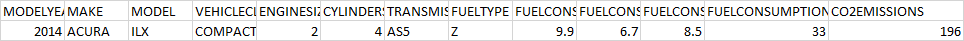

This DataTable is very suitable for a small-middle range data size, because with current implementation it stores all data into a main memory.

In [4]:
main_data_table.head  # returns labels of each column

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [5]:
len(main_data_table)  # shows how many rows of data we have

1067

## Features and target selection

By default, there are no features and target pre-defined. Features - set of parameters we are going to use for our model to train it; target - set of outcome we desire to have from our trained model.

For the first time, I'm interested how engine size and fuel consumtion impact on CO2 emission. 

For that, I select following features:

In [6]:
# To define feature/s and target:
main_data_table.activate_features(["FUELCONSUMPTION_COMB_MPG", "ENGINESIZE"])
main_data_table.select_target("CO2EMISSIONS")

Feature FUELCONSUMPTION_COMB_MPG was added
Feature ENGINESIZE was added
Target CO2EMISSIONS was added


Let's draw it.

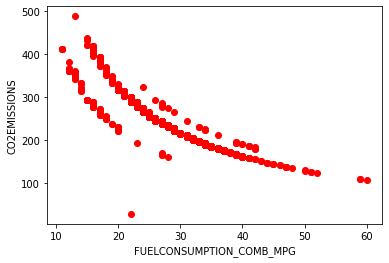

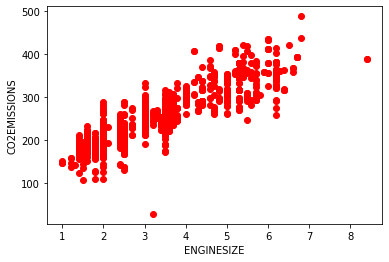

In [7]:
main_data_table.plot(features2target=True)

Our features are defined like

In [8]:
main_data_table.features

{'FUELCONSUMPTION_COMB_MPG': <data_reader.DataTable._DataColumn at 0x17e7b496780>,
 'ENGINESIZE': <data_reader.DataTable._DataColumn at 0x17e7b4965f8>}

We can see that engine size can be filled with a straight line, what we cannot say about fuel consumption parameter.
To showcase capabilities of my packages, I would like to select a parabolic curved feature.

Let's delete engine size feature from our training data set.

In [9]:
main_data_table.deactivate_feature("ENGINESIZE")

Feature ENGINESIZE was disabled from the training set


In [10]:
main_data_table.features

{'FUELCONSUMPTION_COMB_MPG': <data_reader.DataTable._DataColumn at 0x17e7b496780>}

## Training/CV/Testing data sets

DataTable supports data split onto training, cross-validation (direct model testing and selecting the best one) and testing data (for final model testing).

In [11]:
main_data_table.split_data(0.6, 0.2, shuffle=True)

Shuffle was done
Data was split as follows: 0.6 training set, 0.2 cross-validation set and 0.2 test set


In [12]:
# to fetch brand new data for AI purpose
training_data = main_data_table.get_training_data()  # returns (features data, target data)
cv_data = main_data_table.get_cv_data()
testing_data = main_data_table.get_testing_data()

In [13]:
training_data[0][0:5] # feature data

[[17.0], [21.0], [18.0], [29.0], [27.0]]

In [14]:
training_data[1][0:5] # target data

[373.0, 306.0, 359.0, 225.0, 239.0]

In [15]:
data_labels = main_data_table.get_labels()  # to get labels of training/cv/testing data arrays

In [16]:
data_labels

(['FUELCONSUMPTION_COMB_MPG'], 'CO2EMISSIONS')

Now data is prepared for first AI trials with 1 feature and 1 target.

# Section 2<a id='id_2'></a> - model config

In [17]:
regression_model = regression.Regression()  # create model as an entity
regression_model.set_labels(data_labels)  # set labels of our data into the model
regression_model.set_training_data(training_data[0], training_data[1])  # and point this model to our data
regression_model.set_testing_data(cv_data[0], cv_data[1])  # 

True

In [18]:
regression_model

# Section 3<a id='id_3'></a> - first try

In this section I'm going to play a little bit with my model and data we have. Let's set the following parameters:

In [19]:
regression_model.ROUND_AFTER_COMA = 4  # simplify computation by rounding all results to 4 digits after coma

In [20]:
# do first weight coefficients' initialization in range -10...10
regression_model.RANDOM_WEIGHT_INITIALIZATION = 10

# number of iteration 100
regression_model.epoch = 100

# learning rate 0.5
regression_model.alpha = 0.5

# regularization coefficient is 0
regression_model.regularization = 0

Now, we can fit our model with defined training data.

In [21]:
coeffs = regression_model.fit()  # provide model training using defined training data set

Initiated coefficients are [7, -2]
Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


In [22]:
coeffs  # model's trained coefficients

[-1.1518086641218647e+256, -3.2484541461213456e+257]

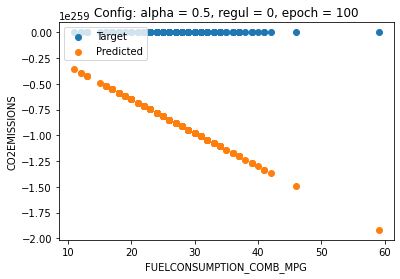

In [24]:
cv_features, cv_target = cv_data
training_features, training_target = training_data
plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper left")

Wow, it seems like we overshooted our global (and local as well) minimum of our model function and it has been decreasing so rapidly. Let's reduce learning coefficient significantly.

In [26]:
regression_model.alpha = 0.01

In [27]:
coeffs = regression_model.fit()

Initiated coefficients are [1, 3]
Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


In [28]:
coeffs

[-4.735256743462196e+79, -1.3354878184543107e+81]

Better, we just reduced coefficients from e+256 to e+79. Still, bad :D

Do we need reduce alpha even more? Let's introduce some regularization as well.

In [29]:
regression_model.alpha = 0.001
regression_model.regularization = 0.2

In [30]:
coeffs = regression_model.fit()
coeffs

Initiated coefficients are [5, 5]
Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


[8.5417, 8.2881]

Looks much better. Let's try these coefficients.

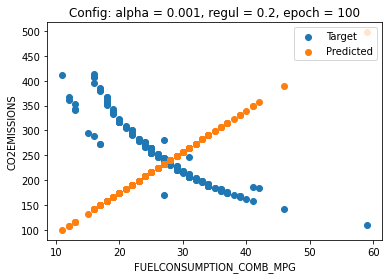

In [32]:
plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper right")

That seems like we didn't fit the model. Increase epoch and alpha? 

In [51]:
regression_model.alpha = 0.002
regression_model.epoch = 500

In [52]:
coeffs = regression_model.fit()
coeffs

Initiated coefficients are [5, -9]
Iteration 126 done
Iteration 251 done
Iteration 376 done
Training is completed with 500 iterations


[38.6522, 7.2205]

Still no. How about to initialize first coefficients in range -1...1?

In [46]:
regression_model.create_coefficients_array(True)  

[-0.9, -0.3]

In [48]:
coeffs = regression_model.fit(scaled_coefficients=True)
coeffs

AttributeError: 'Regression' object has no attribute '__temporary_coefficients'

That's the moment when we have to scale our data

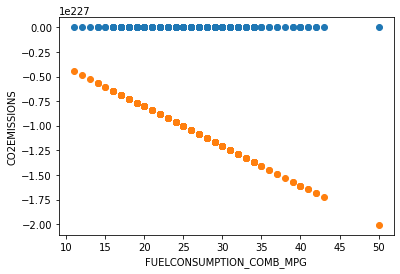

In [37]:
predicted = []
for test in test_features:
    predicted.append(regression_model.predict(test))
axis1 = column2list(test_features, 0)
plt.scatter(axis1, test_target)
plt.scatter(axis1, predicted)
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.show()

plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper right")

We faced a problem that we cannot select appropriate coefficients/parameters for our model to learn properly. 
At some moment we have overshoot, at another one - undershoot. May be data is still didn't ready? 

# Section 4<a id='id_4'></a> - real game

In this section I will try to create the best 1 feature - 1 target model.

Let's scale our data as x = x / max(|X|), so the feature and the target will be in a range -1...1. 
To do so, we apply the following:

In [53]:
main_data_table.max_scaling()

Column MODELYEAR was scaled
Column MAKE was scaled
Column MODEL was scaled
Column VEHICLECLASS was scaled
Column ENGINESIZE was scaled
Column CYLINDERS was scaled
Column TRANSMISSION was scaled
Column FUELTYPE was scaled
Column FUELCONSUMPTION_CITY was scaled
Column FUELCONSUMPTION_HWY was scaled
Column FUELCONSUMPTION_COMB was scaled
Column FUELCONSUMPTION_COMB_MPG was scaled
Column CO2EMISSIONS was scaled


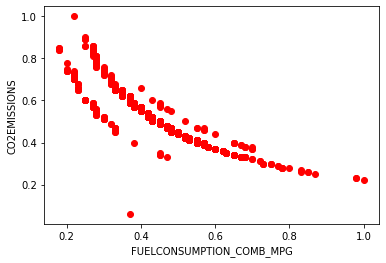

In [54]:
main_data_table.plot(features2target=True)

indeed, as we can see data was scaled properly. Let's try with that data now.

In [56]:
# regenerate training/cv/testing scaled data
scaled_training_data = main_data_table.get_training_data()
scaled_cv_data = main_data_table.get_cv_data()
scaled_testing_data = main_data_table.get_testing_data()

In [57]:
regression_model.set_training_data(scaled_training_data[0], scaled_training_data[1])
regression_model.set_testing_data(scaled_cv_data[0], scaled_cv_data[1])

True

In additional, I'll enable logs' writing to showcase how the model was learning within time.

In [61]:
regression_model.log_mode(True)

Log mode is enable


Let's try we the same config we had at very first time.

In [58]:
regression_model.epoch = 100
regression_model.alpha = 0.5
regression_model.regularization = 0

In [62]:
regression_model.fit()

Initiated coefficients are [7, 3]
Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


[0.6971, -0.3908]

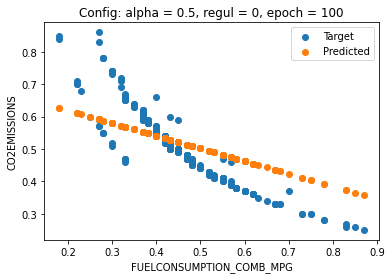

In [63]:
cv_features, cv_target = scaled_cv_data
training_features, training_target = scaled_training_data
plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper right")

Much better!! Regression model has method to evaluate trained model. There is mean absolute error metric as:

In [64]:
regression_model.evaluation(scaled_cv_data, metric="MAE")

0.0671

Assuming all values scaled up to 1, we can say ignorantly that the model gives almost 94% accuracy.

Let's check what logs might show:

In [65]:
logs1 = regression_model.get_logs()

In [67]:
logs1

Logs of model settings alpha = 0.5, reg = 0

Let's use logs to analyse loss functions changes within a time.

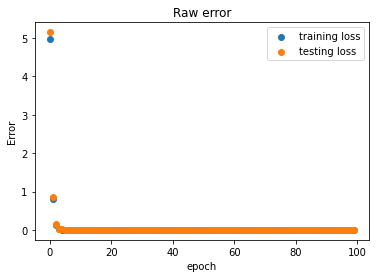

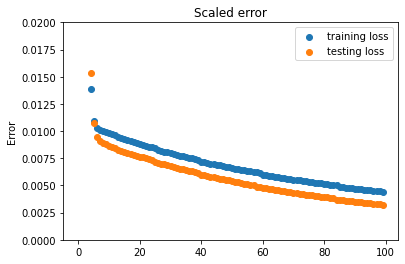

In [74]:
plt.title("Raw error")
iterations = [x for x in range(logs1.iterations)]
cost_function_training = logs1.training_cf
cost_function_cv = logs1.testing_cf
plt.scatter(iterations, cost_function_training, label="training loss")
plt.scatter(iterations, cost_function_cv, label="testing loss")
plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("Error")
plt.show()

plt.title("Scaled error")
plt.ylim([0, 0.02])
plt.scatter(iterations, cost_function_training, label="training loss")
plt.scatter(iterations, cost_function_cv, label="testing loss")
plt.legend(loc="upper right")
plt.ylabel("Error")
plt.show()

Brilliant. It seems like we can increase alpha and number of iteration (epoch) to improve our model. But let's move forward.

## Square feature 

We can add new feature to make the model line looks like parabolic. How about FUELCONSUMPTION_COMB_MPG^2?

To do so, we have to create a new feature data set as follows:

In [77]:
main_data_table.add_new_feature("FUELCONSUMPTION_COMB_MPG", power=2)

New created feature FUELCONSUMPTION_COMB_MPG^(2) was added
This FUELCONSUMPTION_COMB_MPG^(2) feature is added to the list of training set


In [78]:
main_data_table.features  # shows all enabled features

{'FUELCONSUMPTION_COMB_MPG': <data_reader.DataTable._DataColumn at 0x17e7b496780>,
 'FUELCONSUMPTION_COMB_MPG^(2)': <data_reader.DataTable._DataColumn at 0x17e7c275400>}

Also, we can set power = 0.5, which will give square root of selected feature. But for that time we are looking for power of 2.

In [85]:
# regenerate training/cv/testing scaled data
scaled_training_data = main_data_table.get_training_data()
scaled_cv_data = main_data_table.get_cv_data()
scaled_testing_data = main_data_table.get_testing_data()

cv_features, cv_target = scaled_cv_data
training_features, training_target = scaled_training_data

In [86]:
regression_model.set_training_data(scaled_training_data[0], scaled_training_data[1])
regression_model.set_testing_data(scaled_cv_data[0], scaled_cv_data[1])

True

In [87]:
regression_model.epoch = 100
regression_model.alpha = 0.5
regression_model.regularization = 0
regression_model.fit()

Initiated coefficients are [-9, -2, -8]
Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


[0.2054, 3.0751, -4.9421]

In [88]:
regression_model.coefficients

[0.2054, 3.0751, -4.9421]

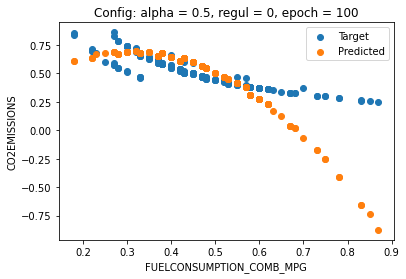

In [89]:
plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper right")

In [90]:
regression_model.evaluation(scaled_cv_data, metric="MAE")

0.1187

Clearly we can see that the model is undertrained. How about to increase epoch?

In [95]:
regression_model.epoch = 2000

In [96]:
regression_model.fit()

Initiated coefficients are [-10, -4, 3]
Iteration 501 done
Iteration 1001 done
Iteration 1501 done
Training is completed with 2000 iterations


[1.2802, -2.4825, 1.6173]

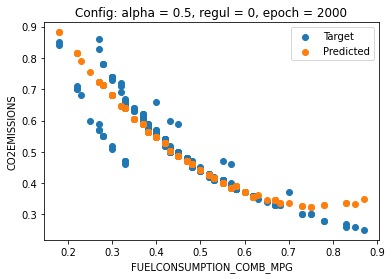

In [97]:
plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper right")

In [98]:
regression_model.evaluation(scaled_cv_data, metric="MAE")

0.0287

Great! Now it looks more to what we want. But still it's not perfect. At first look we can provide some regularization to reduce square power. 

Let's figure out what we can do.

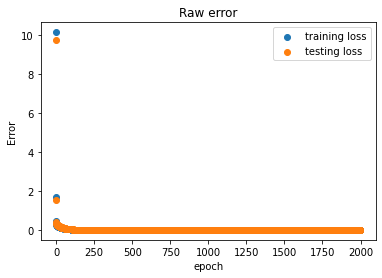

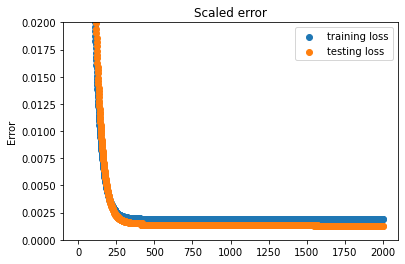

In [99]:
logs_0alph5_0regul_2000epoch = regression_model.get_logs()
logs1 = logs_0alph5_0regul_2000epoch
plt.title("Raw error")
iterations = [x for x in range(logs1.iterations)]
cost_function_training = logs1.training_cf
cost_function_cv = logs1.testing_cf
plt.scatter(iterations, cost_function_training, label="training loss")
plt.scatter(iterations, cost_function_cv, label="testing loss")
plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("Error")
plt.show()

plt.title("Scaled error")
plt.ylim([0, 0.02])
plt.scatter(iterations, cost_function_training, label="training loss")
plt.scatter(iterations, cost_function_cv, label="testing loss")
plt.legend(loc="upper right")
plt.ylabel("Error")
plt.show()

From loss functions analysis we can see that epoch >= 1000 is not necessary, so it just wastes a time. Let's dive into alpha and regul parameters more.

In [131]:
regression_model.epoch = 1200
regression_model.alpha = 0.4
regression_model.regularization = 0.1
regression_model.fit()

Initiated coefficients are [-7, -10, -5]
Iteration 301 done
Iteration 601 done
Iteration 901 done
Training is completed with 1200 iterations


[1.1254, -1.7868, 0.8921]

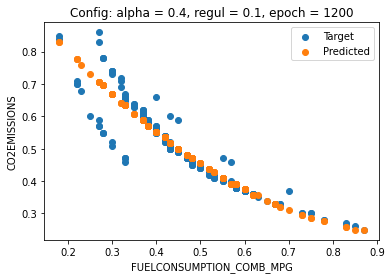

In [132]:
plot2d_target2predict(regression_model, cv_features, cv_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper right")

In [133]:
regression_model.evaluation(scaled_cv_data, metric="MAE")

0.0257

In [136]:
regression_model.evaluation(scaled_testing_data, metric="MAE")

0.0226

## 1 feature - 1 target model results

The best trained model is: 

CO2EMISSIONS = 1.1254 - 1.7868 * FUELCONSUMPTION_COMB_MPG + 0.8921 * FUELCONSUMPTION_COMB_MPG^2

which gives only 0.0257 MAE or 2.57% error of the scaled data, and 0.0226 on the testing data.

Let's store this model for further usage.

In [137]:
model_1_1 = regression_model
model_1_1.coefficients

[1.1254, -1.7868, 0.8921]

# Section 5<a id='id_5'></a> - more features - more fun

How about to add more features into our model? What minimum MAE we might get? Let's explore.

In this section I'm going to build more complex model with way more features than it was before.

In [138]:
# so to create new model and repeat section 4 plus minus. 
# Then, compare results between 1 feature and multi-features models.